# Import library

In [1]:
import numpy as np
import pandas as pd
import pyapep_storage2 as pa
import matplotlib.pyplot as plt
import pyiast

# Isotherm Data

## Key Information

In [2]:
par_ch4 = [7.26927417, 0.33068804] # Based on mol/kg vs bar
par_n2 = [0.62864572, 7.26379457, 1.47727665, 0.04093633] # Based on mol/kg vs bar

dH_list = [14.46664, 10.14106] ## kJ
T_ref_list = [220,220]  ## K

rho_solid = 1000 ## kg/m^3

def Lang(p_in,par):
    qtmp = par[0] * par[1]*p_in/(1+par[1]*p_in)
    return qtmp

def Quad(p_in,par):
    qtmp = par[0]*(par[1]*p_in+2*par[2]*p_in**2)/(1+par[1]*p_in + par[2]*p_in**2)
    return qtmp

def DSLa(p_in,par):
    qtmp1 = par[0]*par[2]*p_in/(1+par[2]*p_in)
    qtmp2 = par[1]*par[3]*p_in/(1+par[3]*p_in)
    qtmp_return = qtmp1 + qtmp2
    return qtmp_return

Text(0.5, 1.0, 'N2 dummy')

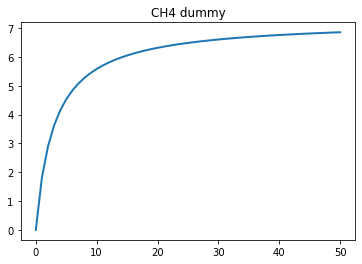

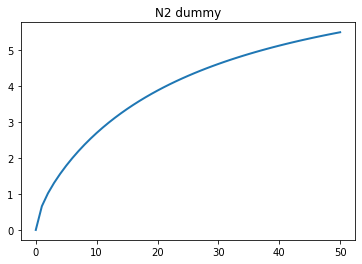

In [3]:
## CH4 Case ##
p_test = np.linspace(0,50, 51)
qch4_test = Lang(p_test,par_ch4)
di_ch4 = {'p':p_test,'q':qch4_test}
df_ch4 = pd.DataFrame(di_ch4)

plt.figure()
plt.plot(p_test,qch4_test,linewidth = 2)
plt.title('CH4 dummy')


## N2 Case ##
p_test = np.linspace(0,50, 51)
qn2_test = DSLa(p_test,par_n2)
di_n2 = {'p':p_test,'q':qn2_test}
df_n2 = pd.DataFrame(di_n2)

plt.figure()
plt.plot(p_test,qn2_test,linewidth = 2)
plt.title('N2 dummy')

## Fitting with pyiast

In [4]:
iso0 = pyiast.ModelIsotherm(df_ch4,
                            loading_key='q',pressure_key = 'p',
                            model= 'Langmuir', 
                            param_guess = {
                                'M': par_ch4[0],
                                'K':par_ch4[1],
                                })
print(iso0.params)

iso1 = pyiast.ModelIsotherm(df_n2,
                            loading_key='q',pressure_key = 'p',
                            model= 'DSLangmuir', 
                            param_guess = {'M1': par_n2[0],
                                           'M2': par_n2[1],
                                           'K1': par_n2[2],
                                           'K2': par_n2[3],
                                           })
print(iso1.params)
iso_pyiast = [iso0, iso1]

{'M': 7.26927417, 'K': 0.33068804}
{'M1': 0.62864572, 'K1': 1.47727665, 'M2': 7.26379457, 'K2': 0.04093633}


# Test Storage Tank Model

In [5]:
### Conditions ###

# %% Feed conditions
# Inlet conditions ?
feed_composition = [0.995,0.005]
T_inlet = 300 # K

# %% Heat capacity info
# Heat related properties (methane; nitrogen) + (zeolite)
Cp_g = np.array([40.63,29.22])  # Gas heat capacity: J/mol/K
Cp_s = 948                      # Solid heat capacity: J/kg/K

x_gas = [0.995,0.005]
T_current = [298]
#T_current = [250]
P_init = 1
P_norm = np.exp(np.array(dH_list)*1000/8.3145*(1/np.array(T_current) - 1/np.array(T_ref_list)))*x_gas*P_init
q_init_eq = pyiast.iast(P_norm,[iso0,iso1],)
print('[q_inti_1, q_init_2] = ')
print(q_init_eq)
#q_solid = [0.0,0.0]
q_solid = list(q_init_eq)

initial_variables = x_gas + q_solid + T_current


[q_inti_1, q_init_2] = 
[0.28958544 0.00123286]


In [6]:
Result_test = pa.storage_tank(feed_composition,iso_pyiast,dH_list,T_ref_list,
                              initial_variables,P_in=3, T_in = T_inlet)
Perf_test = pa.Massbal_interation(Result_test.x[0:2], Result_test.x[2],
                                  feed_composition,iso_pyiast,dH_list,T_ref_list,
                                  initial_variables,P_in=3, T_in = T_inlet)
print(Perf_test)

SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


Differential Evolution IS PICKED !!!
(2443.3524809782443, array([0.43000336, 0.00207522]), 0, array([ True,  True]))


# For different pressure and temperature

## Import Feed Conditions

[314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314.
 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314.
 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314.
 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314.
 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314.
 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314.
 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314. 314.
 314. 314.]
[  2.           5.01010101   8.02020202  11.03030303  14.04040404
  17.05050505  20.06060606  23.07070707  26.08080808  29.09090909
  32.1010101   35.11111111  38.12121212  41.13131313  44.14141414
  47.15151515  50.16161616  53.17171717  56.18181818  59.19191919
  62.2020202   65.21212121  68.22222222  71.23232323  74.24242424
  77.25252525  80.26262626  83.27272727  86.28282828  89.29292929
  92.3030303   95.31313131  98.32323232 101.33333333 104.34343434
 107.35353535 110.36363636 11

Text(0.5, 1.0, 'Feed Conditions After Compressor')

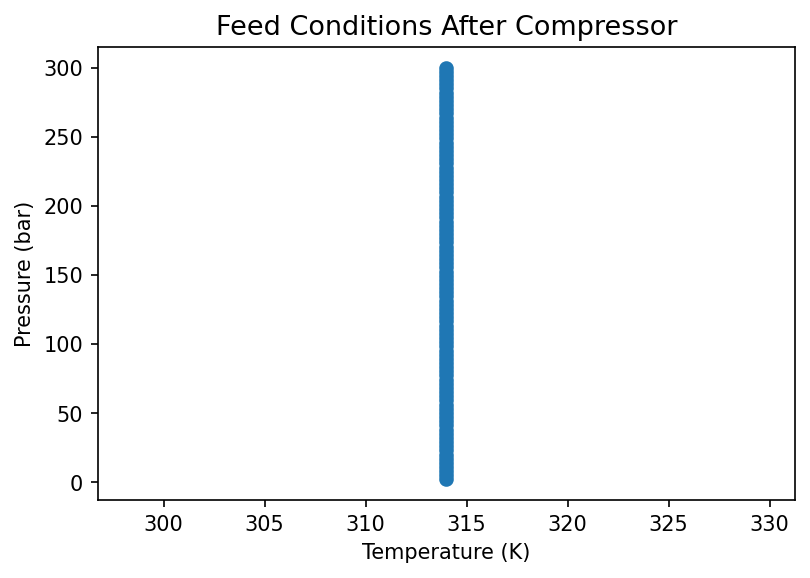

In [7]:
Pfeed_arr = np.linspace(2,300, 99+1)
Tfeed_arr = 314*np.ones(len(Pfeed_arr))
print(Tfeed_arr)
print(Pfeed_arr)

## Graph ##
plt.figure(dpi =150)
plt.plot(Tfeed_arr,Pfeed_arr, 'o')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (bar)')
plt.title('Feed Conditions After Compressor',fontsize = 13)

In [8]:
del_M_list = []
T_fin_list = []
L = 5
A = 3.1416
epsi = 0.4
Mmolar = np.array([0.016, 0.028])       # kg/mol
M_av = np.sum(np.array(x_gas)*Mmolar)   # kg/mol
Design_spec = {'A': A, 'L':L,'rho_s':rho_solid, 'epsi':0.4}
Mw_av = np.sum(
    np.array(feed_composition)*np.array([0.016, 0.028])) # kg/mol [CH4, N2]
M_ad = (rho_solid*L*A*(1-epsi))

ind1_tmp =37
ind2_tmp =-1
PP_tmp1 = Pfeed_arr[ind1_tmp]
TT_tmp1 = Tfeed_arr[ind1_tmp]
PP_tmp2 = Pfeed_arr[ind2_tmp]
TT_tmp2 = Tfeed_arr[ind2_tmp]
print(PP_tmp1, 'bar &', TT_tmp1, 'K')
print(PP_tmp2, 'bar &', TT_tmp2, 'K')
print()
re_tmp1 = pa.storage_tank(feed_composition,iso_pyiast, dH_list, T_ref_list,
                          initial_variables,
                          P_in = PP_tmp1, T_in=TT_tmp1,
                          Design=Design_spec)  
    
Perf_tmp1 = pa.Massbal_interation(re_tmp1.x[0:2], re_tmp1.x[2],
                                  feed_composition,iso_pyiast,
                                  dH_list,T_ref_list,
                                  initial_variables, P_in = PP_tmp1, T_in = TT_tmp1,
                                  Design=Design_spec)
# @ 100 bar : kg CH4 / kg MOF
mol_tmp1 = Perf_tmp1[0]
kg_tmp1 = Mw_av*mol_tmp1
kgkg_tmp1 = kg_tmp1/M_ad

T_tmp1 = re_tmp1.x[2]


re_tmp2 = pa.storage_tank(feed_composition,iso_pyiast, dH_list, T_ref_list,
                          initial_variables,
                          P_in = PP_tmp2, T_in=TT_tmp2,
                          Design=Design_spec)  
Perf_tmp2 = pa.Massbal_interation(re_tmp2.x[0:2], re_tmp2.x[2],
                                  feed_composition,iso_pyiast,
                                  dH_list,T_ref_list,
                                  initial_variables, P_in = PP_tmp2, T_in = TT_tmp2,
                                  Design=Design_spec)
# @ 300 bar : kg CH4 / kg MOF
mol_tmp2 = Perf_tmp2[0]
kg_tmp2 = Mw_av*mol_tmp2
kgkg_tmp2 = kg_tmp2/M_ad

T_tmp2 = re_tmp2.x[2]
print()
print('||  Storage RESULT : @ 100bar & @ 300bar ||')
print()

#print('{0:8f}'.format(kgkg_tmp1), ' kg NG/kg MOF')
#print('{0:8f}'.format(kgkg_tmp2), ' kg NG/kg MOF')
print('{0:8f}'.format(kgkg_tmp1))
print('{0:8f}'.format(kgkg_tmp2))
print()
print('|| Delta T RESULT: @ 100bar & @ 300bar ||')
print()
print('{0:8f}'.format(T_tmp1))
print('{0:8f}'.format(T_tmp2))

113.37373737373737 bar & 314.0 K
300.0 bar & 314.0 K



C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!

||  Storage RESULT : @ 100bar & @ 300bar ||

0.072264
0.092232

|| Delta T RESULT: @ 100bar & @ 300bar ||

53.663583
57.047987


## Run Storage Model

In [8]:
del_M_list = []
T_fin_list = []
L = 5
A = 3.1416
epsi = 0.4
Mmolar = np.array([0.016, 0.028])       # kg/mol
M_av = np.sum(np.array(x_gas)*Mmolar)   # kg/mol
Design_spec = {'A': A, 'L':L,'rho_s':rho_solid, 'epsi':0.4}
for T_ff, P_ff in zip(Tfeed_arr, Pfeed_arr):
    Result_tmp = pa.storage_tank(feed_composition,iso_pyiast, dH_list,T_ref_list,
                                initial_variables, 
                                P_in = P_ff, T_in = T_ff,
                                Design=Design_spec)
    Perf_tmp = pa.Massbal_interation(Result_tmp.x[0:2], Result_tmp.x[2],
                                     feed_composition,iso_pyiast,
                                     dH_list,T_ref_list,
                                     initial_variables, P_in = P_ff, T_in = T_ff,
                                     Design=Design_spec)
    del_M_list.append(Perf_tmp[0])
    T_fin_list.append(Result_tmp.x[2])

SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(


Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params[

SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3

SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:363: RuntimeWarning: invalid value encountered in log
  return self.params["M1"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:365: RuntimeWarning: invalid value encountered in log
  self.params["M2"] * np.log(
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


SHGO METHOD IS USED !!!
Differential Evolution METHOD IS USED !!!
Differential Evolution IS PICKED !!!


## Graph (Storage)

In [16]:
len(Pfeed_arr)
#len(Pfeed_arr)

100

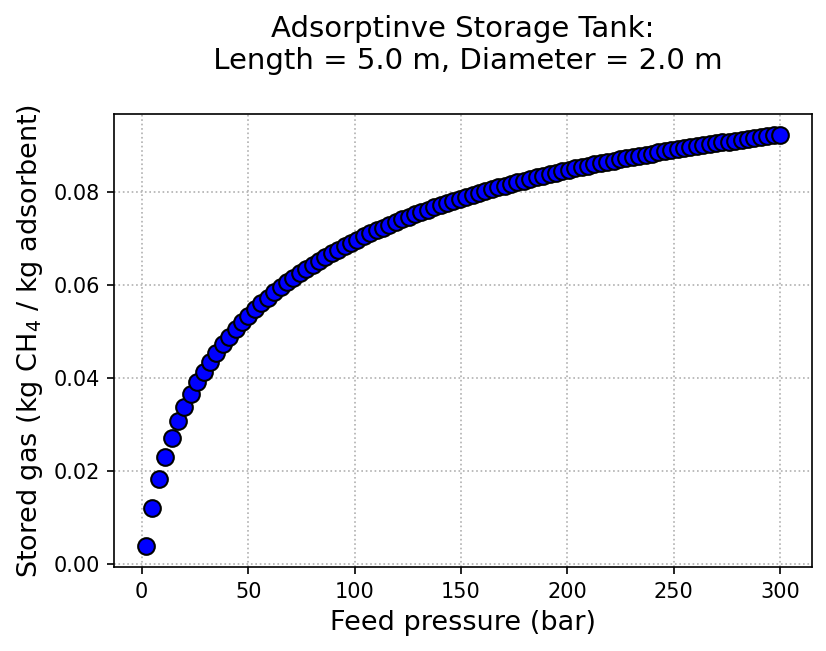

In [17]:
Mw_av = np.sum(
    np.array(feed_composition)*np.array([0.016, 0.028])) # kg/mol [CH4, N2]
del_M_kg = Mw_av*np.array(del_M_list)

plt.figure(dpi = 150)
plt.plot(Pfeed_arr, del_M_kg / (rho_solid*L*A*(1-epsi)),
         'o', color = 'k',markersize = 8, mfc = 'b')
plt.xlabel('Feed pressure (bar)', fontsize = 13)
plt.ylabel('Stored gas (kg CH$_{4}$ / kg adsorbent)', fontsize = 13)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m\n'.format(Leng,Diam), fontsize = 14)

plt.grid(linestyle = ':')

## Graph (Temperature)

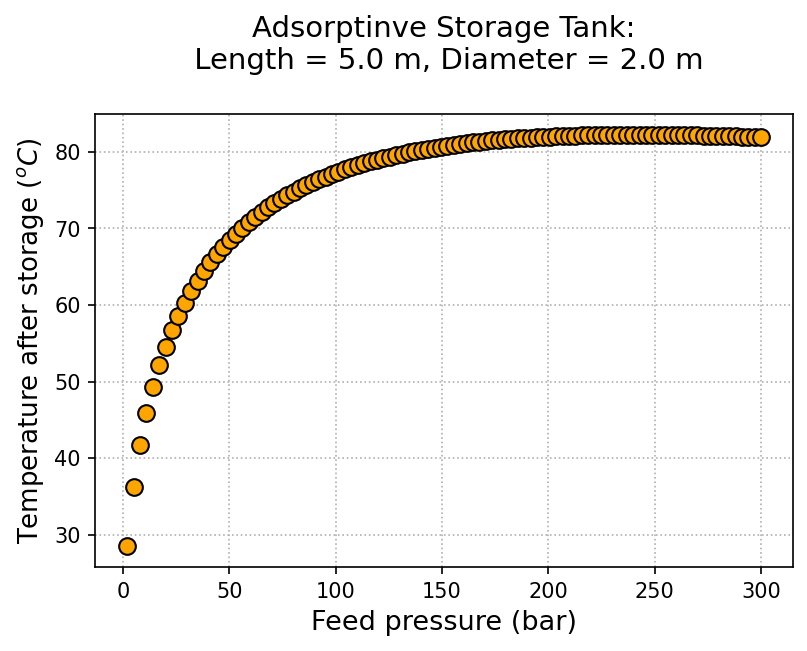

In [18]:
plt.figure(dpi = 150)
plt.plot(Pfeed_arr, np.array(T_fin_list) + T_current[0] - 273.15,
         'o', color = 'k',markersize = 8,mfc = 'orange')

plt.xlabel('Feed pressure (bar)', fontsize = 13)
plt.ylabel('Temperature after storage ($^{o}C$)', fontsize = 12.5)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m\n'.format(Leng,Diam), fontsize = 14)

plt.grid(linestyle = ':')

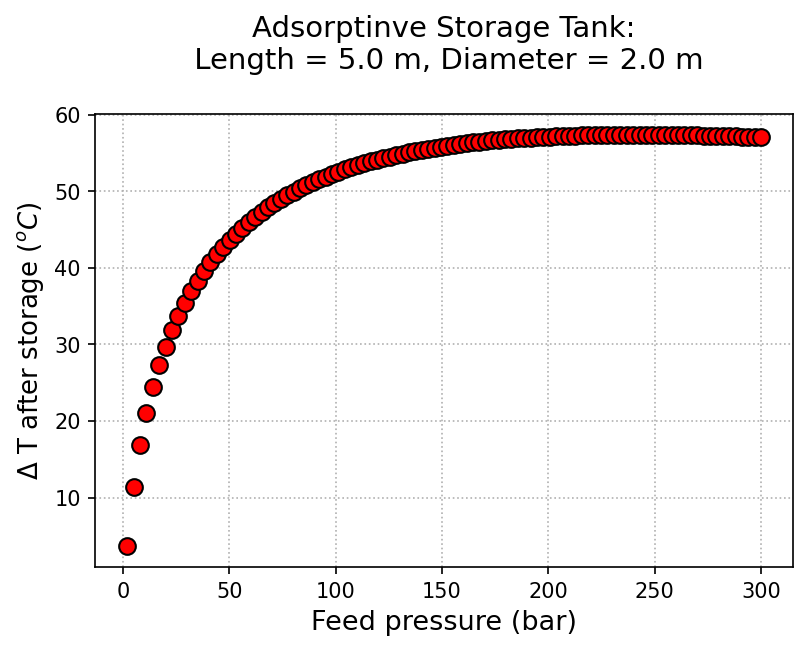

In [19]:
plt.figure(dpi = 150)
plt.plot(Pfeed_arr, T_fin_list, 
        'o', color = 'k',markersize = 8,mfc = 'r')

plt.xlabel('Feed pressure (bar)', fontsize = 13)
plt.ylabel('$\Delta$ T after storage ($^{o}C$)', fontsize = 12.5)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m\n'.format(Leng,Diam), fontsize = 14)

plt.grid(linestyle = ':')

# Surrogate Model

In [20]:
import scipy.optimize as optim

## Storage

In [21]:
def fn_guess(par,P):
    #T_return = par[0]*(par[1]*P)/(1+ par[1]*P) + par[2]*(par[3]*P)/(1+ par[3]*P)
    #del_m_return = par[0]*(par[1]*P**par[2])/(1+ par[1]*P**par[2])
    #del_m_return = par[0]*(par[1]*(P))/(1+ par[1]*(P))
    #del_m_return = par[0]*(par[1]*(P-P_init)**par[2])/(1+ par[1]*(P-P_init)**par[2])
    #del_m_return = par[0]*(par[1]*(P-P_init)+2*par[2]*(P-P_init)**2 + +3*par[3]*(P-P_init)**3)/(1+ par[1]*(P-P_init)+par[2]*(P-P_init)**2+par[3]*(P-P_init)**3)
    del_m_return = par[0]*(par[1]*(P-P_init)**par[4])/(1+par[1]*(P-P_init)**par[4]) + par[2]*(par[3]*(P-P_init))/(1+par[3]*(P-P_init))
    #del_m_return = par[0]*(par[1]*(P-P_init))/(1+par[1]*(P-P_init)) + par[2]*(P-P_init)
    return del_m_return 

def err_storage(par):
    #del_m_tmp = par[0]*par[1]*Pfeed_arr/(1+ par[1]*Pfeed_arr)
    del_m_tmp = fn_guess(par,Pfeed_arr[:])
    err = del_m_tmp - del_M_kg[:] / (rho_solid*L*A*(1-epsi))
    err_sq_sum = np.sum(err**2)
    return err_sq_sum
#es_opt = optim.shgo(err_storage, bounds=[[100,1000],[0,50]])

res_opt = optim.minimize(err_storage, x0 = [1, 0.005,1,0.005,1.5],
                        method = 'Nelder-mead',)
#optim_bound = [[0,10],[-2,2],[0,2],[-2,2]]
#res_opt = optim.shgo(err_storage,bounds = optim_bound)                        
print(res_opt)
res_opt_M = res_opt
psol = res_opt.x
P_ran = np.linspace(Pfeed_arr[0],Pfeed_arr[-1],201)
del_M_pred = fn_guess(psol, P_ran)

 final_simplex: (array([[-1.11841145,  0.00782331,  1.25431188,  0.00969766,  1.04450023],
       [-1.11848001,  0.0078236 ,  1.25436509,  0.00969705,  1.04447199],
       [-1.11839356,  0.00782332,  1.25431094,  0.00969756,  1.0445057 ],
       [-1.11846439,  0.00782353,  1.25435328,  0.00969718,  1.04447599],
       [-1.11832742,  0.00782309,  1.25426387,  0.00969806,  1.04453224],
       [-1.11840075,  0.00782334,  1.25431364,  0.00969755,  1.04450463]]), array([1.80176697e-05, 1.80176810e-05, 1.80177277e-05, 1.80179832e-05,
       1.80181404e-05, 1.80181601e-05]))
           fun: 1.8017669692893944e-05
       message: 'Optimization terminated successfully.'
          nfev: 502
           nit: 304
        status: 0
       success: True
             x: array([-1.11841145,  0.00782331,  1.25431188,  0.00969766,  1.04450023])


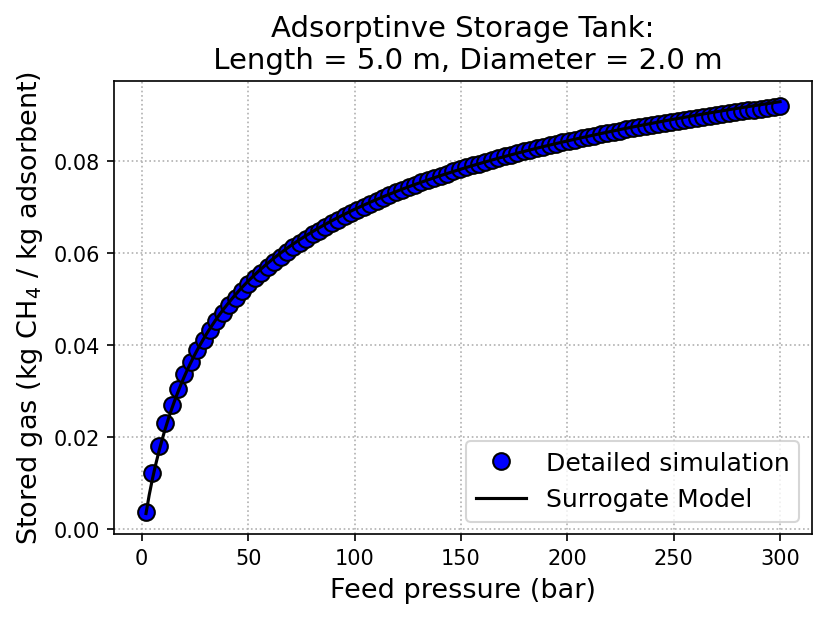

In [25]:
Mw_av = np.sum(
    np.array(feed_composition)*np.array([0.016, 0.014])) # kg/mol [CH4, N2]
del_M_kg = Mw_av*np.array(del_M_list)

plt.figure(dpi = 150)
plt.plot(Pfeed_arr, del_M_kg/ (rho_solid*L*A*(1-epsi)),
         'o', color = 'k',markersize = 8, mfc = 'b',
        label = 'Detailed simulation')
plt.plot(P_ran,del_M_pred,'k',label = 'Surrogate Model')

plt.xlabel('Feed pressure (bar)', fontsize = 13)
#plt.ylabel('Stored gas (kg)', fontsize = 13)
plt.ylabel('Stored gas (kg CH$_{4}$ / kg adsorbent)', fontsize = 13)

plt.legend(fontsize = 12)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m'.format(Leng,Diam), fontsize = 14)

plt.grid(linestyle = ':')

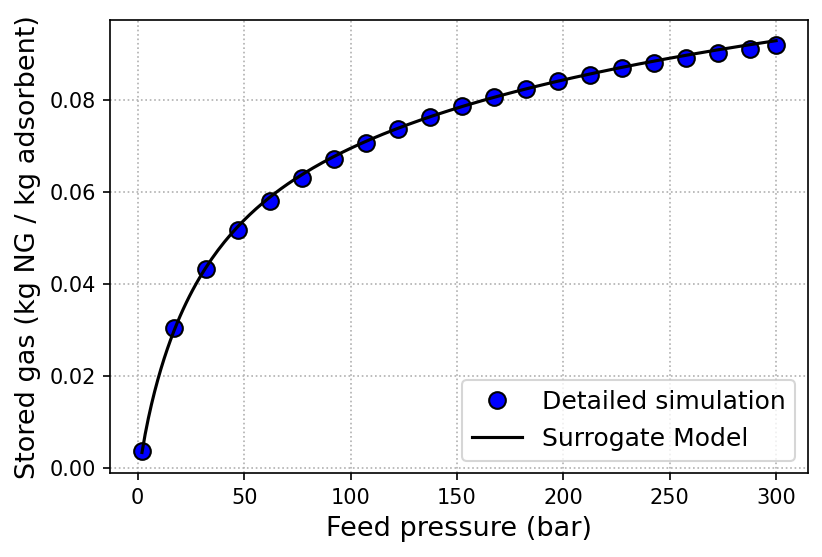

In [27]:
Mw_av = np.sum(
    np.array(feed_composition)*np.array([0.016, 0.014])) # kg/mol [CH4, N2]
del_M_kg = Mw_av*np.array(del_M_list)

plt.figure(dpi = 150)
Pfeed_arr_new = np.concatenate([Pfeed_arr[::5], [Pfeed_arr[-1]]])
del_M_kg_ov_M_ad = np.concatenate([del_M_kg[::5]/ (rho_solid*L*A*(1-epsi)),[del_M_kg[-1]/ (rho_solid*L*A*(1-epsi))]] )
plt.plot(Pfeed_arr_new, del_M_kg_ov_M_ad,
         'o', color = 'k',markersize = 8,
         mfc = 'b',label = 'Detailed simulation')

#plt.plot(Pfeed_arr[::5], del_M_kg[::5]/ (rho_solid*L*A*(1-epsi)),
#         'o', color = 'k',markersize = 8, mfc = 'b',
#        label = 'Detailed simulation')
plt.plot(P_ran,del_M_pred,'k',label = 'Surrogate Model')

plt.xlabel('Feed pressure (bar)', fontsize = 13)
#plt.ylabel('Stored gas (kg)', fontsize = 13)
plt.ylabel('Stored gas (kg NG / kg adsorbent)', fontsize = 13)

plt.legend(fontsize = 12)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
#plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m \n'.format(Leng,Diam), fontsize = 14)

plt.grid(linestyle = ':')

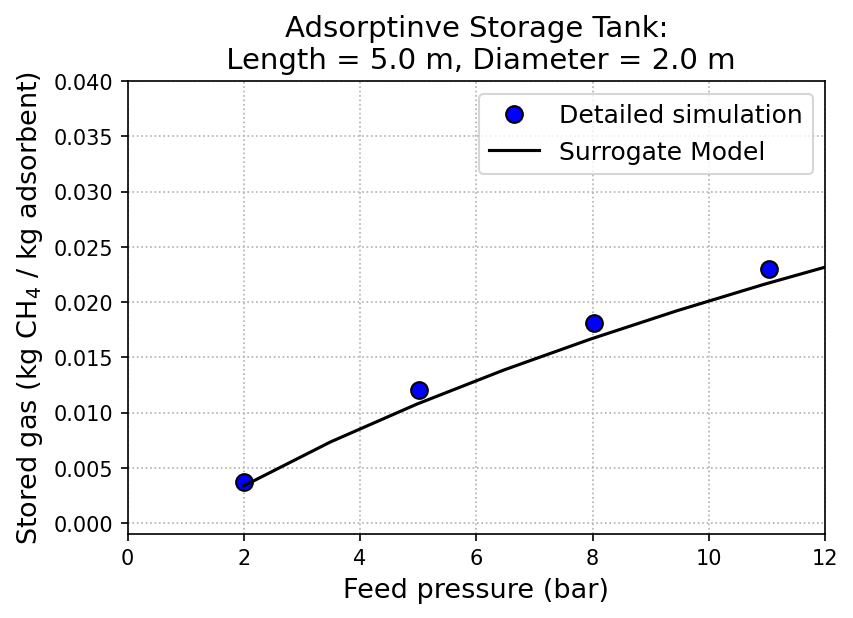

In [23]:
Mw_av = np.sum(
    np.array(feed_composition)*np.array([0.016, 0.014])) # kg/mol [CH4, N2]
del_M_kg = Mw_av*np.array(del_M_list)

plt.figure(dpi = 150)
plt.plot(Pfeed_arr, del_M_kg / (rho_solid*L*A*(1-epsi)),
         'o', color = 'k',markersize = 8, mfc = 'b',
        label = 'Detailed simulation')
plt.plot(P_ran,del_M_pred,'k',label = 'Surrogate Model')


plt.xlabel('Feed pressure (bar)', fontsize = 13)
#plt.ylabel('Stored gas (kg)', fontsize = 13)
plt.ylabel('Stored gas (kg CH$_{4}$ / kg adsorbent)', fontsize = 13)

plt.legend(fontsize = 12)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m'.format(Leng,Diam), fontsize = 14)
plt.xlim(0, 12)
plt.ylim(-0.001, 0.04)
plt.grid(linestyle = ':')

## Temperture Shift

In [28]:
def fn_guess(par,P):
    #T_return = par[0]*(par[1]*P)/(1+ par[1]*P) + par[2]*(par[3]*P)/(1+ par[3]*P)
    T_return = par[0]*(par[1]*(P-P_init)**par[2])/(1+ par[1]*(P-P_init)**par[2])
    return T_return
    
def err_tempshif(par):
    #del_m_tmp = par[0]*(2*par[1]*Pfeed_arr+par[2]*Pfeed_arr**2)/(1+ par[1]*Pfeed_arr+par[2]*Pfeed_arr**2)
    #del_m_tmp = par[0]*(2*par[1]*Pfeed_arr+par[2]*Pfeed_arr**2)/(1+ par[1]*Pfeed_arr+par[2]*Pfeed_arr**2)
    #del_m_tmp = par[0]*(par[1]*Pfeed_arr)/(1+ par[1]*Pfeed_arr) + par[2]*(par[3]*Pfeed_arr)/(1+ par[3]*Pfeed_arr)
    T_tmp = fn_guess(par,Pfeed_arr)
    err = T_tmp - np.array(T_fin_list)
    err_sq_sum = np.sum(err**2)
    return err_sq_sum
#res_opt = optim.shgo(err_storage, bounds=[[20,200],[0,10],[0,20],[0,100]])
res_opt = optim.minimize(err_tempshif, x0 = [113.8, 0.05, 5],
                        method = 'Nelder-Mead')
print(res_opt)
res_opt_T = res_opt
psol = res_opt.x
P_ran = np.linspace(0,Pfeed_arr[-1],111)
T_fin_pred = fn_guess(psol, P_ran)

 final_simplex: (array([[6.21531102e+01, 4.48088384e-02, 1.03105942e+00],
       [6.21530978e+01, 4.48082886e-02, 1.03106206e+00],
       [6.21530113e+01, 4.48082431e-02, 1.03106388e+00],
       [6.21531401e+01, 4.48096424e-02, 1.03105319e+00]]), array([45.40247023, 45.40247023, 45.40247024, 45.40247026]))
           fun: 45.402470228390335
       message: 'Optimization terminated successfully.'
          nfev: 448
           nit: 253
        status: 0
       success: True
             x: array([6.21531102e+01, 4.48088384e-02, 1.03105942e+00])


<ipython-input-28-73429b6ee8ac>:3: RuntimeWarning: invalid value encountered in power
  T_return = par[0]*(par[1]*(P-P_init)**par[2])/(1+ par[1]*(P-P_init)**par[2])


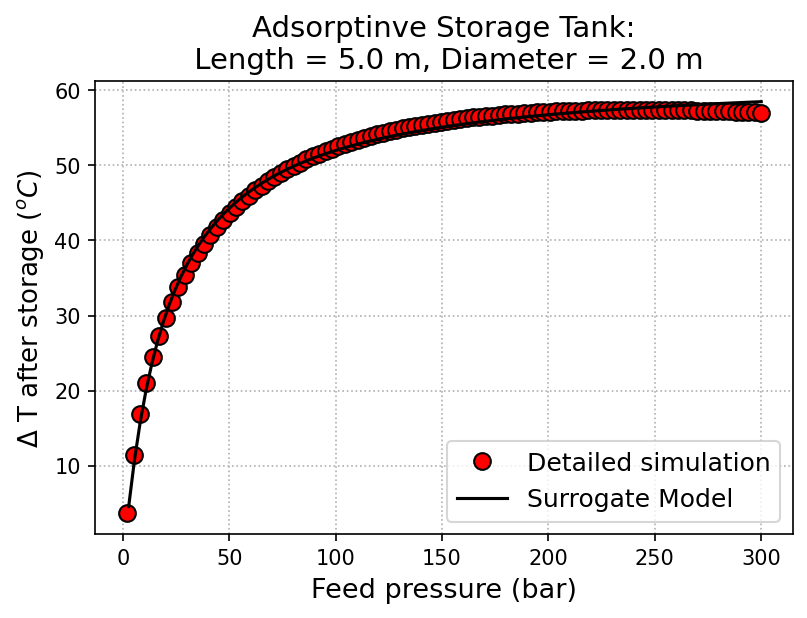

In [29]:
plt.figure(dpi = 150)
plt.plot(Pfeed_arr, T_fin_list, 
        'o', color = 'k',markersize = 8,mfc = 'r',
        label = 'Detailed simulation')

plt.xlabel('Feed pressure (bar)', fontsize = 13)
plt.ylabel('$\Delta$ T after storage ($^{o}C$)', fontsize = 12.5)

plt.plot(P_ran,T_fin_pred,'k',label = 'Surrogate Model')

plt.legend(fontsize = 12)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m'.format(Leng,Diam), fontsize = 14)

plt.grid(linestyle = ':')

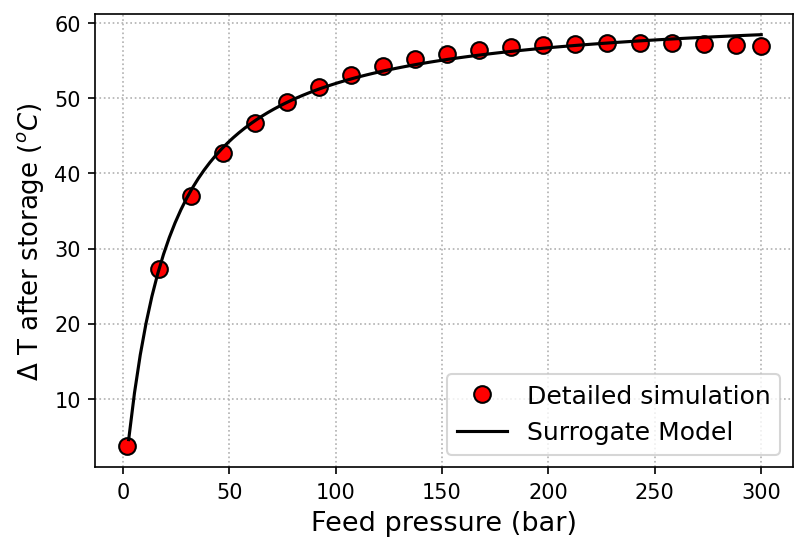

In [31]:
plt.figure(dpi = 150)

Pfeed_arr_new = np.concatenate([Pfeed_arr[::5],[Pfeed_arr[-1]]])
T_fin_list_new = np.concatenate([T_fin_list[::5], [T_fin_list[-1]]])

plt.plot(Pfeed_arr_new, T_fin_list_new, 
        'o', color = 'k',markersize = 8,mfc = 'r',
        label = 'Detailed simulation')

plt.xlabel('Feed pressure (bar)', fontsize = 13)
plt.ylabel('$\Delta$ T after storage ($^{o}C$)', fontsize = 12.5)

plt.plot(P_ran,T_fin_pred,'k',label = 'Surrogate Model')

plt.legend(fontsize = 12)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
#plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m\n'.format(Leng,Diam), fontsize = 14)

plt.grid(linestyle = ':')

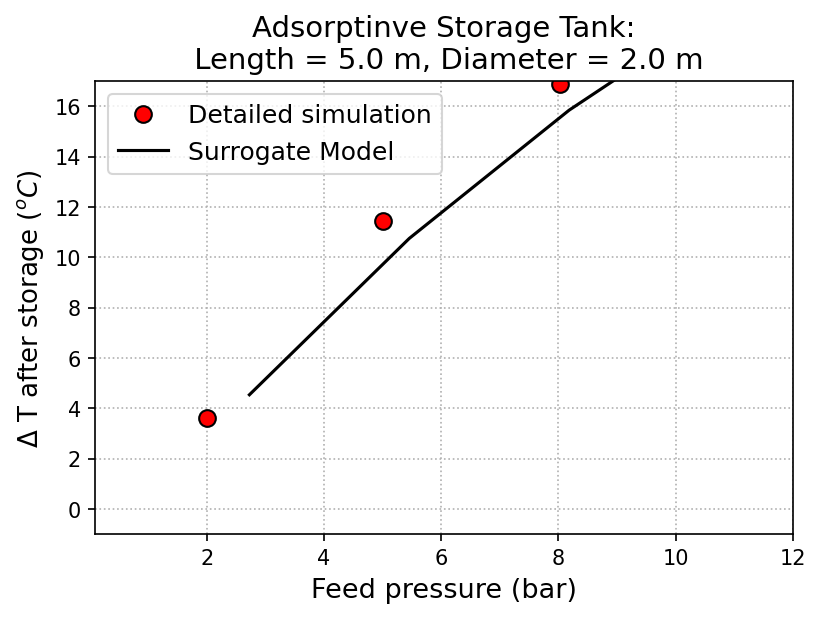

In [55]:

plt.figure(dpi = 150)
plt.plot(Pfeed_arr, T_fin_list, 
        'o', color = 'k',markersize = 8,mfc = 'r',
        label = 'Detailed simulation')

plt.xlabel('Feed pressure (bar)', fontsize = 13)
plt.ylabel('$\Delta$ T after storage ($^{o}C$)', fontsize = 12.5)

plt.plot(P_ran,T_fin_pred,'k',label = 'Surrogate Model')

plt.legend(fontsize = 12)

Leng = Design_spec['L']
Diam = np.sqrt(Design_spec['A']/3.1416)*2
plt.title('Adsorptinve Storage Tank:\n Length = {0:.1f} m, Diameter = {1:.1f} m'.format(Leng,Diam), fontsize = 14)

plt.xlim(0.1,12)
plt.ylim(-1, 17)

plt.grid(linestyle = ':')

In [32]:
print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
print('[[Final Result: Surrogate Model]]')
print('=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
print()
print('Mass capacity:')
print('M (kg CH4 / kg adsorbent) = ')
print('k1*k2*( P - P_init )^k3 / ( 1 + k2*( P - P_init )^k3 ) ')
print('  + k4*k5*( P - P_init ) / ( 1 + k2*( P - P_init ) ) ')

print()
print('[k1 , k2, k3, k4, k5] = ')
print('[',res_opt_M.x[0],res_opt_M.x[1],res_opt_M.x[-1],
 res_opt_M.x[2], res_opt_M.x[3], ']')
print()
print()

print('Temperature difference:')
print('dT (K) = ')
print('j1*(j2*(P-P_init)**j3)/(1+ j2*(P-P_init)**j3)')
print()
print('[j1 , j2, j3] = ')
print(res_opt_T.x)
#a = input('enter any key to complete this.')


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
[[Final Result: Surrogate Model]]
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Mass capacity:
M (kg CH4 / kg adsorbent) = 
k1*k2*( P - P_init )^k3 / ( 1 + k2*( P - P_init )^k3 ) 
  + k4*k5*( P - P_init ) / ( 1 + k2*( P - P_init ) ) 

[k1 , k2, k3, k4, k5] = 
[ -1.1184114492349044 0.007823312307463963 1.0445002334282996 1.254311881012912 0.009697658060276372 ]


Temperature difference:
dT (K) = 
j1*(j2*(P-P_init)**j3)/(1+ j2*(P-P_init)**j3)

[j1 , j2, j3] = 
[6.21531102e+01 4.48088384e-02 1.03105942e+00]


In [41]:
print('Specific \nCapacity (kg/kg) \nat 50 bar =')
print()
print( del_M_kg[-1]/ ((1-epsi)*A*L*rho_solid)  )
print('(kg/kg)')

Specific 
Capacity (kg/kg) 
at 50 bar =

0.05304568124004562
(kg/kg)
